---

title: ADC 的使用
keywords: Maixpy3, ADC
desc: maixpy3 doc: ADC

---

| 更新时间 | 负责人 | 内容 | 备注 |
| --- | --- | --- | --- |
| 2022年1月4日 | Rui | 初次编写文档 | --- |
| 2022年1月8日 | Rui | 修改文档的编写方式 | 使用 Jupyter notebook 进行编写文档 |
| 2022年1月18日 | Rui | 修改文档，增加效果图 | 外设文档通过测试的平台有 MaixII-Dock，使用的是 MaixPy3 0.4.0 |
| 2022年1月19日 | dalaoshu | 修订具体描述 | 由于 ADC 相对 SOC Linux 来说是一个特殊的功能，在 MaixPy3 的设计里不通用。 |

ADC 通讯协议，目前只是针对 MaixII-Dock 进行开发的，其他芯片或平台需要仔细阅读数据手册来确认是否支持。

## 使用方法

### 准备

查看对应开发板上的管脚定义图或者是文件，如 MaixII-Dock 管脚定义图所示，将 ADC 设备接入到 GPADC0 的管脚上

![111](./../asserts/M2Dock_pin.jpg)

### 代码

根据数据手册可知 V831 数据地址 0x05070080 处有一个 12bit （0-4095）的 adc 引脚，但该引脚默认被当做 adc-key 使用，使得一个引脚可以支持多个按键事件。

定义 MaixII-Dock ADC 模块

In [1]:
class v83x_ADC():
    def __init__(self, addr=b"0x05070080") -> None:
        self.addr = addr
        self.path = "/sys/class/sunxi_dump/dump"
        self.file = open(self.path, "wb+")
        self.last = self.value()
    def __del__(self):
        try:
            if self.file:
                self.file.close()
                del self.file
        except Exception as e:
            pass
    def value(self):
        self.file.write(b"0x05070080")
        self.file.seek(0)
        return int(self.file.read()[:-1], 16)

v83x_ADC = v83x_ADC()

[dls][ rpyc-kernel ]( running at Wed Jul 13 19:03:06 2022 )


使用 ADC 进行是设备通讯

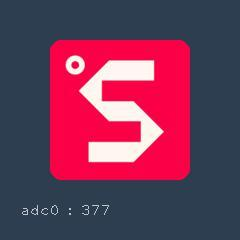


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
import time
from maix import display, image
v831_adc0 = v83x_ADC
while True:
    time.sleep(0.1)
    tmp = image.Image().new((240, 240), (0x2c, 0x3e, 0x50), "RGB")
    val = v831_adc0.value()
    # print(val)
    img = image.Image().open('/home/res/logo.png')
    tmp.draw_image(img, 50, 40, alpha=1).draw_string(20, 200, "adc0 : " + str(val), 1, (0xbd, 0xc3, 0xc7))
    display.show(tmp)

### 运行效果
**旋钮控制**

![](./../asserts/adc-1.gif)

**触控检测**

![](./../asserts/adc-2.gif)

**光照测量**

![](./../asserts/adc-3.gif)

## 了解更多

[什么是 ADC](https://baike.baidu.com/item/%E6%A8%A1%E6%8B%9F%E6%95%B0%E5%AD%97%E8%BD%AC%E6%8D%A2%E5%99%A8/5382125?fr=aladdin)

关于[ Linux ADC ](https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&tn=baidu&wd=linux%20ADC&oq=AD%2526lt%253B&rsv_pq=e7716f6c0000714c&rsv_t=628f6V5N5NUB2ky3bv1AhbIkN%2FFaocfP4Kb9JFMQmgvAQFoNlb%2Fv3y7fEwE&rqlang=cn&rsv_enter=1&rsv_dl=tb&rsv_sug3=9&rsv_sug1=5&rsv_sug7=100&rsv_sug2=0&rsv_btype=t&inputT=3109&rsv_sug4=3697)